In [1]:
import glob
print(glob.glob("/share/*"))

['/share/stocks_to_numpy_file.ipynb', '/share/all_stocks.npy', '/share/input.txt', '/share/us-stock-dataset', '/share/Transformers1', '/share/short_stocks.npy']


In [2]:
import sys
import os

import numpy as np
import torch
from torch import nn as nn
import glob

from t4.timeseries_transformer2 import TransformerConfig, TransformerRunner

from timeseries.csv_reader import read_and_merge_csv_files

from t3_karpathy.commons.commons import BaseTransformerConfig, min_max_scaling, extract_sliding_windows, z_scale, diff, standardize
from t3_karpathy.token_codec import TokenCodec
from t4.generic_dataloader import GenericDataloader
from timeseries.timeseries_transformer import TimeseriesDataloader

import torch
import matplotlib.pyplot as plt

In [3]:
data_loader_data=torch.tensor(np.load('/share/short_stocks.npy')).transpose(0, 1).cpu()
data_loader_data.shape

torch.Size([145, 5283])

In [4]:
data_loader_data.std(1)

tensor([  23.2384,   23.7617,   21.6897,   20.7613,   35.8314,   31.9676,
          25.2722,   15.1839,  128.0243,   43.4098,   11.9321,   10.8525,
         103.2019,   55.5136,   20.6267,   31.6318,   88.8389,   78.8836,
          13.7210,   79.7230,   23.5181,   53.0531,  148.3938,   26.3437,
          11.5081,  713.4839,   12.5933,   29.6434,  118.2293,   16.8346,
          54.2486,   14.5844,   40.6059,  107.0502,   21.9491,   60.2218,
          54.6771,   77.0419,   78.5897,   10.0033,  187.4438,   16.0286,
          64.6127,    8.8380,   24.7720,   53.1130,  234.3294,   21.4004,
          23.3201,   12.6637,   99.1644,   43.5929,    8.3354,   27.5374,
           6.7543,   68.7931,   37.0720,   42.5301,   18.0644,   33.4005,
         107.0502,   11.8405,   36.2503,   11.0550,   71.7311,   40.4823,
          91.5176,   21.1485,   37.5611,   85.0911,   38.2881,   42.5301,
          13.2146,   41.8944,   35.2140,   57.8205,   25.3846,   49.5246,
          64.9794,   30.3103,   20.227

In [5]:
stocks_to_load = [
    "AAPL", "TSLA",
    "GOOG", "AMZN", "PYPL", "NVDA", "AMD", "NFLX", "MSFT", "INTC",
    # "A", 
    # "CSCO", "ADBE", "CRM", "QCOM", "TXN", "AVGO",
    # "INTU", "ORCL", "COST", "SBUX", "AMGN", "CHTR", "GILD", "CMCSA", "BKNG",
    # "MDLZ", "FISV", "BIIB", "MU", "MCD", "AMAT", "ADP", "ILMN", "ATVI", "ISRG",
    # "ADSK", "LRCX", "BIDU", "JD", "REGN", "WBA", "VRTX", "KHC", "WMT", "ZM", "MELI",
    # "TMUS", "CTSH", "XLNX", "PCAR", "ALGN", "WDAY", "SIRI", "CTXS", "ADI", "EXC", "LULU",
    # "MAR", "KLAC", "PAYX", "EA", "ILMN", "ALXN", "MNST", "BMRN", "EBAY", "CTAS", "VRSK",
    # "IDXX", "CDNS", "NXPI", "ASML", "INCY", "KLAC", "MCHP", "SNPS", "SWKS", "VRSN",
    # "WDC", "WYNN", "XLNX", "ZBRA", "ZTS", "AEP", "AIG", "ALL", "AXP", "BA", "BAC",
    # "BK", "BLK", "C", "CAT", "CL", "COF", "COP", "COST", "CSCO", "CVS", "CVX",
    # "DD", "DHR", "DIS", "DOW", "DUK", "EMR", "EXC", "F", "FDX", "GD", "GE", "GILD",
    # "GM", "GOOG", "GOOGL", "GS", "HD", "HON", "IBM", "INTC", "JNJ", "JPM", "KHC", "KMI",
    # "KO", "LLY", "LMT", "LOW", "MA", "MCD", "MDLZ", "MDT", "MET", "MMM",
    # 'BLND', 'BLNG', 'BLNKW', 'BLNGU', 'BLNGW', 'BLNK', 'BLPH', 'BLRX',
    # 'BLTE', 'BLU', 'BLUA', 'BLUE', 'BLW', 'BLX', 'BLZE', 'BMA', 'BMAC', 'BMAQ', 'BMAQR', 'BMAQU'
]
#directory_path = '/share/us-stock-dataset/Data/Stocks'
#dataloader = TimeseriesDataloader(directory_path, stocks_to_load, add_diff=False)
#data_loader_data=dataloader.get_data().transpose(0,1)
print(data_loader_data.shape)

torch.Size([145, 5283])


In [6]:
data = data_loader_data

In [7]:
data = diff(data, 1)
data = standardize(data, -1)

In [8]:
data.std(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

In [9]:
windowed = extract_sliding_windows(data, 8)
windowed.shape

torch.Size([145, 5275, 8])

In [10]:
windowed[0, 1, :]

tensor([-0.0209, -0.1449,  0.0146, -0.0593, -0.0977, -0.1043,  0.0744,  0.0050])

In [11]:
flat_windowed = windowed.reshape(windowed.shape[0]* windowed.shape[1], -1)
print(flat_windowed.shape)

torch.Size([764875, 8])


In [12]:
device = 'cuda'

torch.manual_seed(1337)

config = TransformerConfig(
    input_embed=flat_windowed.shape[1], 
    precision=torch.bfloat16, 
    batch_size=128, 
    block_size=1, 
    n_embed=128, 
    n_head=4, 
    n_layer=4, 
    learning_rate=0.001,
    causal=True
)

runner = TransformerRunner(config, flat_windowed)

runner.train_iterate_n(25000)

context = torch.zeros((1, 1), dtype=torch.long, device=device)
# print(dataloader.token_codec.decode(runner.generate(context, max_new_tokens=2000)[0].tolist()))

1.002376 M parameters
step 0: train loss 0.9918, val loss 0.7716, time/iter 3.5762786865234374e-08
saved model version 1
step 100: train loss 0.3817, val loss 0.3007, time/iter 0.020550651550292967
step 200: train loss 0.3845, val loss 0.3085, time/iter 0.020372223854064942
step 300: train loss 0.3913, val loss 0.2864, time/iter 0.01991020917892456
step 400: train loss 0.3757, val loss 0.2890, time/iter 0.019565997123718263
step 500: train loss 0.3740, val loss 0.2942, time/iter 0.01991913080215454
step 600: train loss 0.3709, val loss 0.3040, time/iter 0.017369370460510253
step 700: train loss 0.3828, val loss 0.2866, time/iter 0.021832563877105714
step 800: train loss 0.3766, val loss 0.3011, time/iter 0.020317649841308592
step 900: train loss 0.3943, val loss 0.3299, time/iter 0.017568459510803224
step 1000: train loss 0.3787, val loss 0.3141, time/iter 0.018606884479522703
saved model version 2
step 1100: train loss 0.3900, val loss 0.3356, time/iter 0.020008037090301512
step 1200:

/tmp/ipykernel_906/2515724815.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(data).to('cpu')


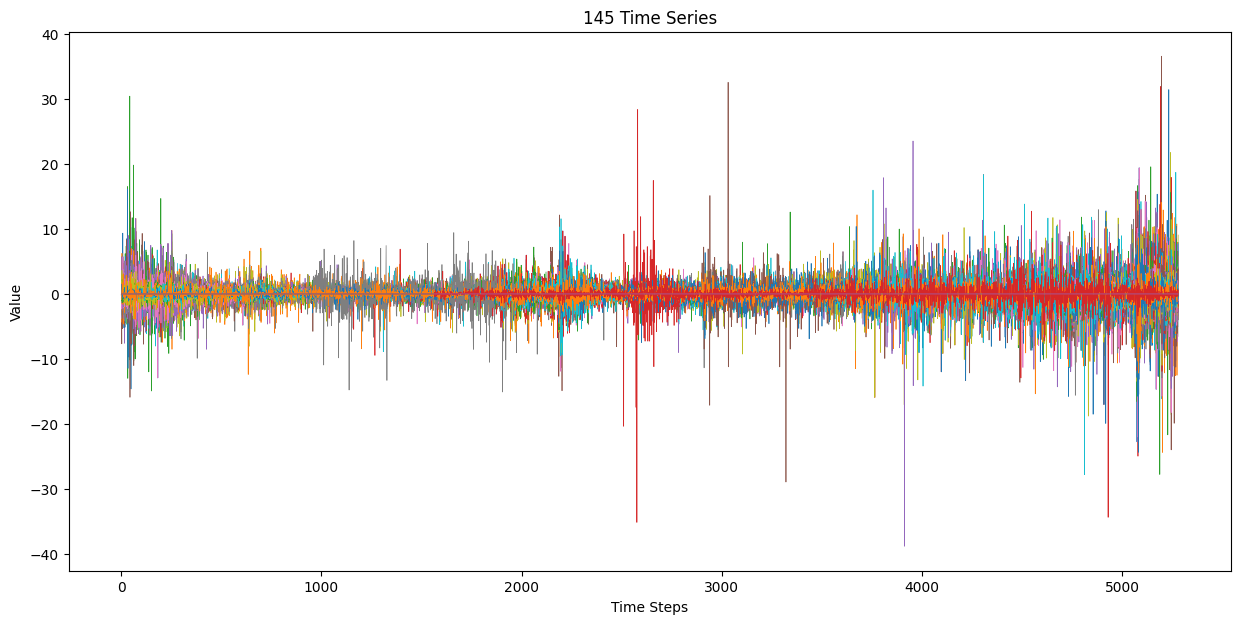

In [13]:

# Generate a sample tensor (you can replace this with your tensor)
tensor = torch.tensor(data).to('cpu')

# Plotting
plt.figure(figsize=(15, 7))
for i in range(tensor.shape[0]):
    plt.plot(tensor[i].numpy(), linewidth=0.5)  # Convert tensor to numpy for plotting

plt.title("145 Time Series")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.show()


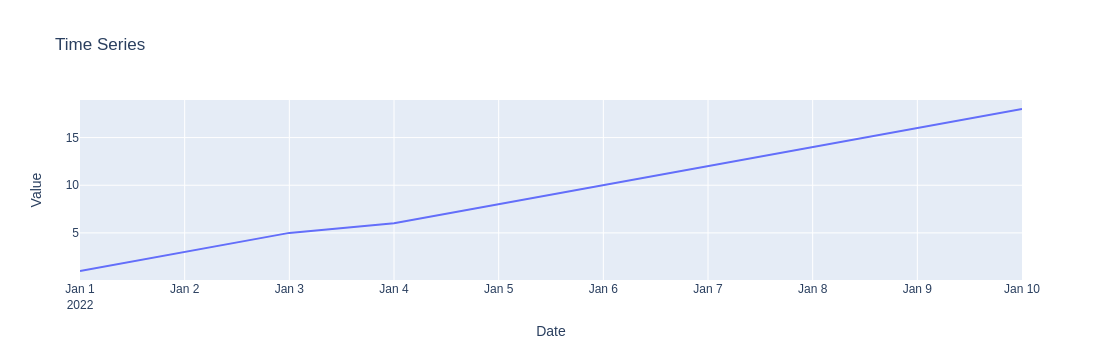

In [14]:
import pandas as pd
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

import plotly.express as px

# Sample data
data = {
    'Date': pd.date_range(start='2022-01-01', periods=10, freq='D'),
    'Value': [1, 3, 5, 6, 8, 10, 12, 14, 16, 18]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Plotting using Plotly
fig = px.line(df, x='Date', y='Value', title='Time Series')
fig.show()


In [15]:
!pip install plotly